

# Project: Investigate a Dataset (Medical Appointment No Shows!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Medical Appointment No Shows dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

 
### General Properties

In [2]:
rawan = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
rawan.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
rawan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
rawan.shape

(110527, 14)

In [5]:
rawan.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
rawan.duplicated().sum()

0

In [7]:
rawan.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

 

### Data Cleaning  

<span style="color:blue">1-Fix the name of the column<span>


In [8]:
rawan.rename(columns={'Handcap': 'Handicap'}, inplace=True)

<span style="color:blue">2-Convert the datatype to datetime then apply changes<span>

In [9]:
rawan['ScheduledDay']=pd.to_datetime(rawan['ScheduledDay'])

In [10]:
rawan['AppointmentDay']=pd.to_datetime(rawan['AppointmentDay'])

In [11]:
rawan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


<span style="color:blue"> 3-Find if there 0 value or -1 in Age the delete it make sense<span>

In [12]:
rawan.query('Age == "0"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,0,0,0,0,0,0,No
89,4.314932e+14,5640380,M,2016-04-29 10:37:02,2016-04-29,0,MONTE BELO,0,0,0,0,0,0,No
101,6.822847e+13,5642813,M,2016-04-29 17:24:19,2016-04-29,0,BONFIM,0,0,0,0,0,0,No
104,3.326985e+12,5632495,F,2016-04-28 08:04:48,2016-04-29,0,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
132,8.468587e+14,5560742,M,2016-04-08 09:29:23,2016-04-29,0,PRAIA DO SUÁ,0,0,0,0,0,1,Yes
150,5.392419e+10,5641476,M,2016-04-29 13:43:34,2016-04-29,0,ITARARÉ,0,0,0,0,0,0,No


In [13]:
rawan.drop(rawan.loc[rawan['Age']==0].index, inplace=True)
 

In [14]:
 rawan.query('Age == "-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
rawan.drop(rawan.loc[rawan['Age']==-1].index, inplace=True)

<span style="color:blue">5-Delete unused columns in analysis <span>

In [16]:
rawan.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay','Neighbourhood','Scholarship'], axis=1, inplace=True)


In [17]:
rawan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 8 columns):
Gender          106987 non-null object
Age             106987 non-null int64
Hipertension    106987 non-null int64
Diabetes        106987 non-null int64
Alcoholism      106987 non-null int64
Handicap        106987 non-null int64
SMS_received    106987 non-null int64
No-show         106987 non-null object
dtypes: int64(6), object(2)
memory usage: 7.3+ MB


<a id='eda'></a>
## Exploratory Data Analysis

 

### Research Question 1 (Comparison between  patients gender! )

<span style="color:blue"> As you can see below the pie chart shows that the numbers of female patients is greater than male </span>

In [18]:
F=rawan[rawan['Gender']== 'F'] 
M=rawan[rawan['Gender']== 'M'] 
 

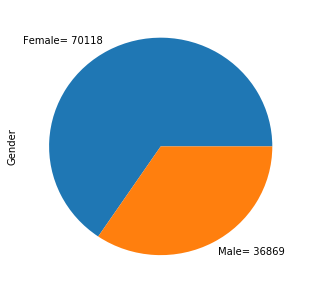

In [19]:
Fn='Female= '+str(len(F))
Mn='Male= '+str(len(M))
tgender = [Fn, Mn]
series = pd.Series([len(F),len(M)], 
                   index=tgender, 
                   name='Gender')

series.plot.pie(figsize=(5, 5))

### Research Question 2  (Comparison between Patients show up or not )

<div style="color:blue"> As you can see below the pie chart shows that the numbers of Patients <span style="color:red">NOT</span> show up is greater than Patients show up</div>

In [20]:
N=rawan[rawan['No-show']== 'No'] 
Y=rawan[rawan['No-show']== 'Yes'] 

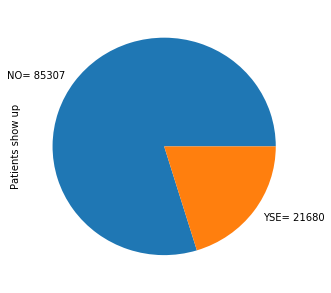

In [21]:
NO='NO= '+str(len(N))
YSE='YSE= '+str(len(Y))
showup = [NO, YSE]
series = pd.Series([len(N),len(Y)], 
                   index=showup, 
                   name='Patients show up')

series.plot.pie(figsize=(5, 5))

### Research Question 3  (Comparison between Patients SMS received & show up )

<div style="color:blue"> As you can see below the pie chart shows that the numbers of Patients SMS <span style="color:red">NOT</span> received & show up is greater than Patients SMS received & show up</div>

In [22]:
A=rawan.query('SMS_received== "1"')+ rawan[rawan['No-show']== 'Yes'] 
 
B=rawan.query('SMS_received== "0"')+rawan[rawan['No-show']== 'Yes'] 
 


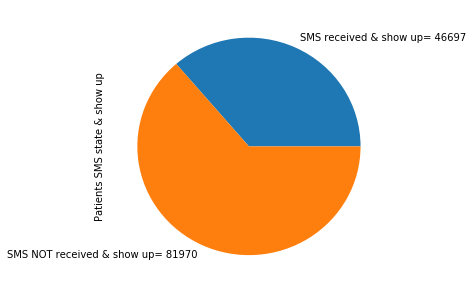

In [23]:
Ysms='SMS received & show up= '+str(len(A))
Nsms='SMS NOT received & show up= '+str(len(B))
showup = [Ysms,Nsms]
series = pd.Series([len(A),len(B)], 
                   index=showup, 
                   name='Patients SMS state & show up')

series.plot.pie(figsize=(5, 5))

### Research Question 4  (Comparison between Patients SMS received & Patients SMS NOT received )

<div style="color:blue"> As you can see below the pie chart shows that the numbers of Patients SMS <span style="color:red">NOT</span> received is greater than Patients SMS received </div>

In [24]:
c=rawan.query('SMS_received== "1"')
d=rawan.query('SMS_received== "0"')

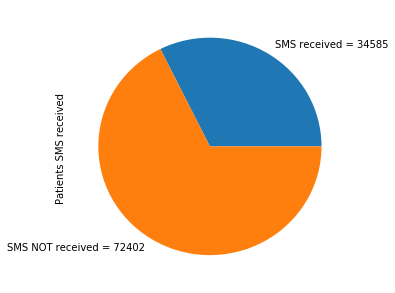

In [25]:
Yre='SMS received = '+str(len(c))
Nre='SMS NOT received = '+str(len(d))
rece = [Yre,Nre]
series = pd.Series([len(c),len(d)], 
                   index=rece, 
                   name='Patients SMS received ')

series.plot.pie(figsize=(5, 5))

### Research Question 5  (Age range )

 <span style="color:blue"> The below boxplot chart shows that the most age is between 19 and 56</span>

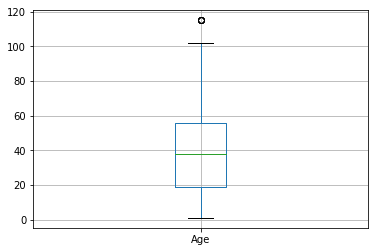

In [26]:
rawan.boxplot(column='Age')

In [27]:
rawan.Age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

### Research Question 6  (Comparison between Diseases )

 <span style="color:blue">This bar chart shows that the Hipertension got the highest value </span>

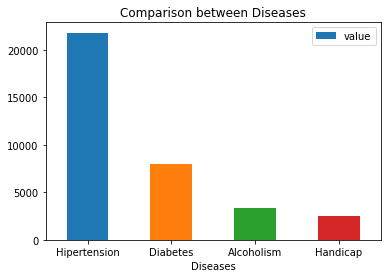

In [28]:
df = pd.DataFrame({'Diseases':[  'Hipertension','Diabetes', 'Alcoholism','Handicap'], 
                    'value':[rawan.Hipertension.sum(), rawan.Diabetes.sum(), rawan.Alcoholism.sum(),rawan.Handicap.sum()]})
df.plot.bar(x='Diseases', y='value', rot=0 ,title="Comparison between Diseases")
 
 
 
 

<a id='conclusions'></a>
## Conclusions
At the end the dataset was almost clean, And I found that the largest percentage is for patients who did not show up in the appointment and also for the patients did not receive the SMS, addition for the diseases I found that the Hipertension got the highest value , due to these founds I suggest the following solutions :<br> 1- send SMS to all patients .
<br>2- Educating the community about the dangers of Hipertension disease and how to prevent it.
<br>3- put a financial penalty for not attending the appointment :) .    


Reference:<br>
<br>1-Numerical Python Course
<br>2-pandas.pydata.org
<br>3-matplotlib.org